##**Context**

The production rates of cars have been rising progressively during the past decade, with almost 92 million cars
being produced in the year 2019. This big rise has allowed the used car market to now come
into the picture as a growing industry. Due to the high cost of new
cars the sale of used cars has been increasing worldwide.
A second hand car price prediction model that accurately predicts the
value of a car considering a range of features would be of great value.

##**Problem statement**

A company named **Ucars** predicts the price of used cars. Lots of customers approach them to get an estimate of the price of the used car that they want to buy.  Let us consider you are a Data Scientist in the Ucars team developing the model that can predict the price of these used cars.

##**Data Dictionary**

We are using the cars dataset from Kaggle, and the description of the features is given below:

**Model**: The brand and model of the car

**Year**: The year or edition of the model

**Transmission**: The type of transmission used by the car (Automatic / Manual)

**Mileage**: The standard mileage offered by the car company in kmpl or km/kg

**Price**: The price of the car

**Color**: Color of the car

##Reading the Dataset

Let us start by uploading the dataset.

In [129]:
# from google.colab import files
# files.upload()

 Now, let us install the latest version of tensorflow.


In [130]:
# !pip install tensorflow

##### Check the version of the installation

In [131]:
import tensorflow as tf
print(tf.__version__)

2.1.0


Now, let us import the data and necessary libraries and get it ready for modelling.

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn     
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

cars_data = pd.read_csv('usedcars.csv')
cars_data

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


In [133]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


##Overview of Dataset

Let's check the null values in each column of the dataset

In [134]:
cars_data.isna().sum()

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64

* As you can see, there are no null values in any of the column

##Data Preprocessing



Let's check for the duplicate observations 

In [135]:
#just some basic preprocessing
cars_data.drop_duplicates()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


Notice that the last three columns (color, Transmission, Model) are not numerical values, but categorical entries?

To utilise the columns, we’ll need to find a way to make them numerical, and a perfect technique is One-hot Encoding

In [136]:
#creating dummy variables for the categorical features
cars_ori=cars_data
cars_data = pd.get_dummies(cars_data,drop_first=True)
cars_data = cars_data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
cars_data

,year,price,mileage,model_SEL,model_SES,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_MANUAL
0,2011.0,21992.0,7413.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2011.0,20995.0,10926.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011.0,19995.0,7351.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011.0,17809.0,11613.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012.0,17500.0,8367.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2006.0,6200.0,95000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146,2002.0,5995.0,87003.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
147,2000.0,5980.0,96841.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
148,2001.0,4899.0,151479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Exploring the column names

In [137]:
cars_data.columns

Index(['year', 'price', 'mileage', 'model_SEL', 'model_SES', 'color_Blue',
       'color_Gold', 'color_Gray', 'color_Green', 'color_Red', 'color_Silver',
       'color_White', 'color_Yellow', 'transmission_MANUAL'],
      dtype='object')

##Inspecting the data



##Univariate Analysis

It’s always good to get some insight about the target variable. The target or dependent variable is price in our case.


In [138]:
df=cars_data
print(df.price.mean())
print(df.price.median())


12961.93359375
13591.5


Mean is slightly  lesser than median which indicates there are few outliers or extreme values. Let’s also check maximum and minimum values:

In [139]:
print(df.price.max())
print(df.price.min())


21992.0
3800.0


Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

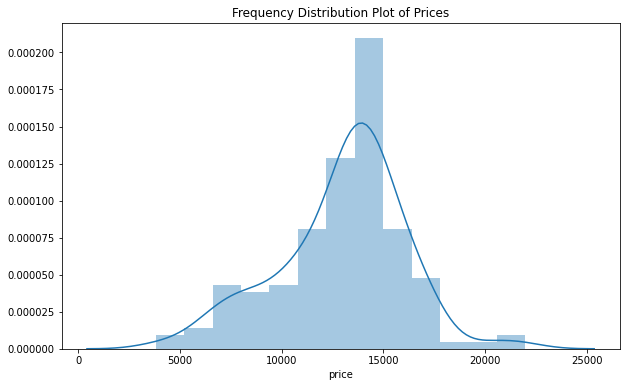

In [140]:
# x = df.price
x = df['price']
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

It can be seen from the graph that the data is looking approx symmetric and the peak is around 10000-15000. Another way of checking the distribution and outliers is boxplot:

<AxesSubplot:ylabel='price'>

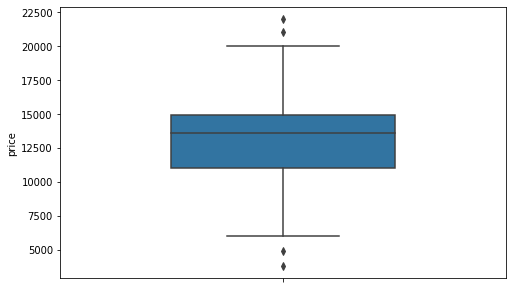

In [141]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price', data=df, width=0.5)

###Removing Outliers 

Dependent variable "price" contains  4 data points which are outliers. The loss function which will be used for regression is MSE. Having outliers in the response variable might give biased model. Let's remove these data points .





In [142]:
#Removing the outlier datapoints because these point might disrupt the modelling
df.drop(df[df.price>20000].index,inplace=True,axis=0)
df.drop(df[df.price<5200].index,inplace=True,axis=0)

<AxesSubplot:ylabel='price'>

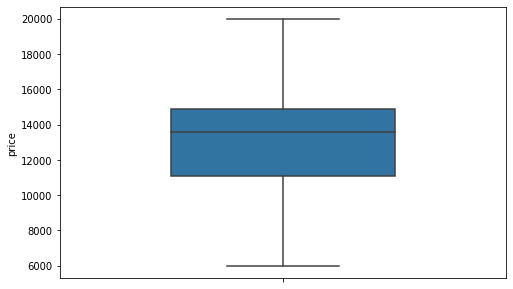

In [143]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price', data=df, width=0.5)

In [144]:
#printing the dataframe
cars_data=df
df

,year,price,mileage,model_SEL,model_SES,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_MANUAL
2,2011.0,19995.0,7351.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011.0,17809.0,11613.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012.0,17500.0,8367.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2010.0,17495.0,25125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,2011.0,17000.0,27393.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2004.0,6980.0,101130.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
144,2004.0,6950.0,119720.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,2006.0,6200.0,95000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
146,2002.0,5995.0,87003.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##Bivariate analysis

Manual and Automatic Cars

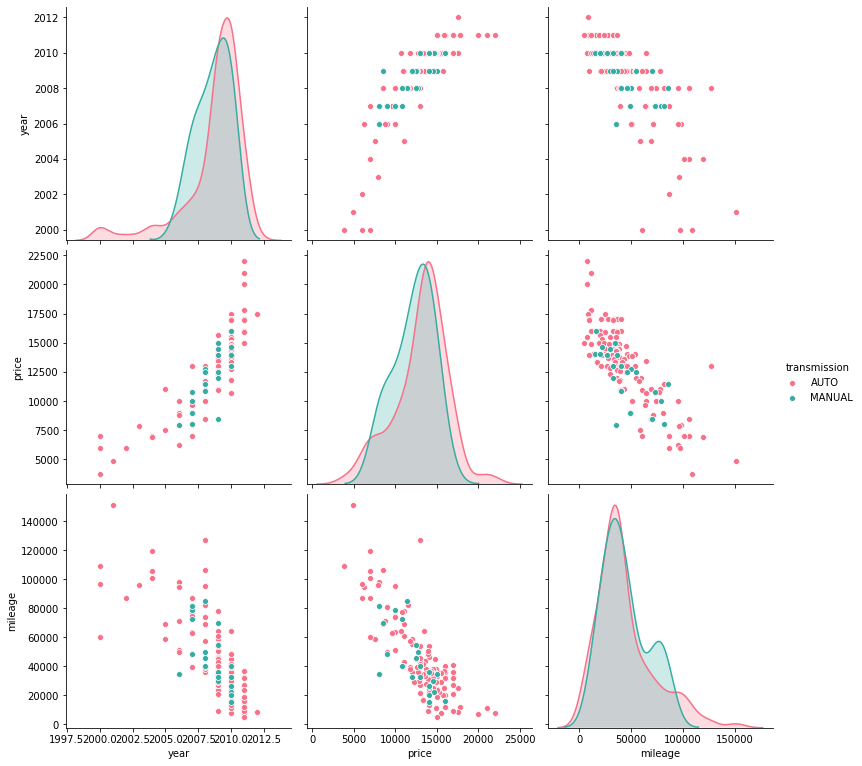

In [145]:
sns.pairplot(cars_ori,hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

* We can see that automatic cars have higher price range than manual type cars though the distribution of automatic cars were skewed to the right. 
* year and price have some amount of linear relationship which means cars which are manufactured recently are costly

* price and mileage is having linear relationship with negative slope which means costly cars have less mileage

Lets visualize  the correlation between the features 

<AxesSubplot:>

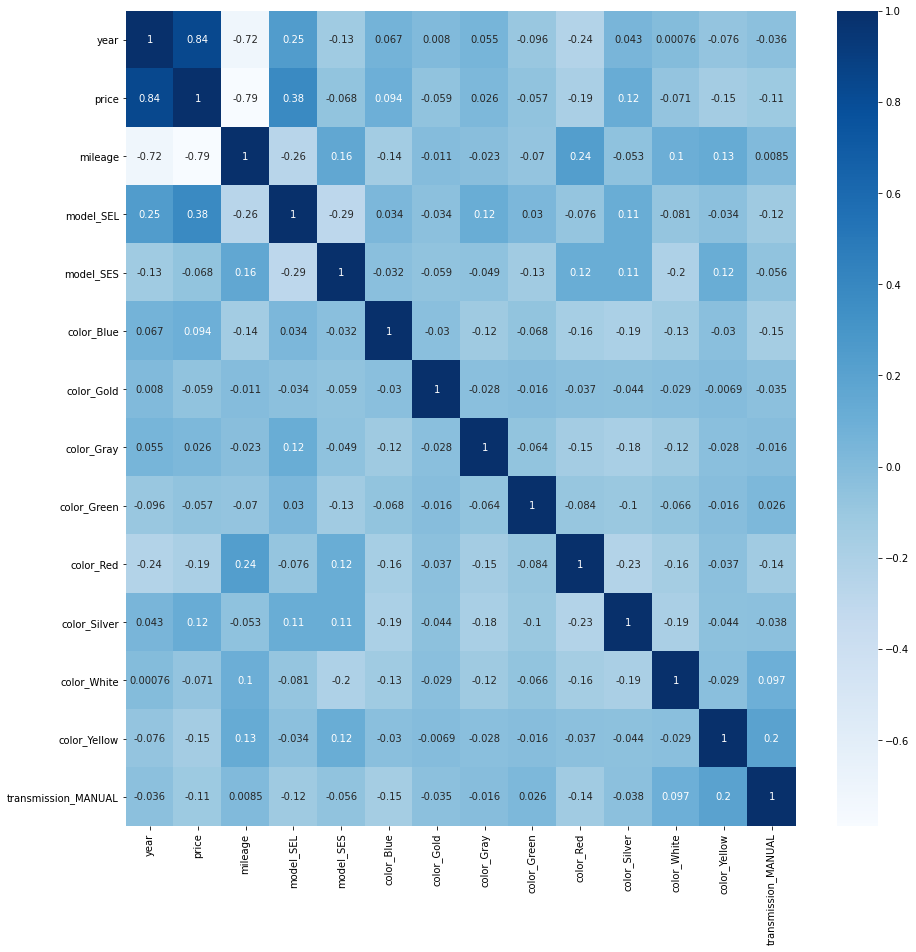

In [146]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cars_data.corr(),cmap="Blues",ax=ax,annot=True)

* year and price are having high positive correlation. 

* mileage and price are high negative corrlation. 

* year and mileage are having high negative correlation.


##Separate the features from labels



In [147]:
#getting the features and labels and finally splitting the test and train data.

X = cars_data[['year','mileage', 'model_SEL', 'model_SES',
     'color_Blue', 'color_Gold', 'color_Gray', 'color_Green',
       'color_Red', 'color_Silver', 'color_White', 'color_Yellow',
       ]]
Y = cars_data['price']

##Splitting the dataset

In [148]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

##Normalizing the train and test data separately

In [149]:
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. You can go ahead and use the other scalars available and chcek the effect on the results.
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# create target scaler object

target_scaler = preprocessing.MinMaxScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = target_scaler.transform(y_test.values.reshape(-1,1))
y_val=target_scaler.transform(y_val.values.reshape(-1,1))


In [150]:
#Printing the data after normalization
X_val.shape

(24, 12)

In [151]:
X_train.shape

(92, 12)

In [152]:
y_val.shape

(24, 1)

##Converting the Numpy array into tensors 

In [153]:
# let us now convert the data elements into tensors as we need tensors to be fed into different tensorflow based operations

X_train1=tf.convert_to_tensor(X_train)
y_train1=tf.convert_to_tensor(y_train)
X_test1=tf.convert_to_tensor(X_test)
y_test1=tf.convert_to_tensor(y_test)
X_val1=tf.convert_to_tensor(X_val)
y_val1=tf.convert_to_tensor(y_val)

In [154]:
#printing the shape of training tensor
X_train1.shape

TensorShape([92, 12])

##Model building

###TensorFlow implementation

#### Let us try modelling now. We will use a few concepts covered in the practice exercise shared with the course material.

In [155]:
input_dim = X_train1.shape[1]
output_dim = 1
learning_rate = 0.01

# Let us initialize the weights and bias variables. 
weights = tf.Variable(tf.zeros(shape=(input_dim, 1), dtype= tf.float32))
bias = tf.Variable(tf.ones(shape=(1,), dtype= tf.float32))

def predict(features):
  return tf.matmul(features, weights) + bias # note that the matmul is matrix multiplication and is needed for calculating predictions

def compute_loss(y_true, predictions):
  return tf.reduce_mean(tf.square(y_true - predictions)) # mean square error

# Let us now define a function to train the model. We will call the other functions in function definition.
def train(x, y,x1,y1):
  with tf.GradientTape() as tape:
    predictions = predict(x)
    loss = compute_loss(y, predictions)
    
    dloss_dw, dloss_db = tape.gradient(loss, [weights, bias]) #note that we can pass lists as well here.
  weights.assign_sub(learning_rate * dloss_dw)
  bias.assign_sub(learning_rate * dloss_db)
  #calculating the validation loss
  predictions1 = predict(x1)
  v_loss = compute_loss(y1, predictions1)
  
  return loss,v_loss

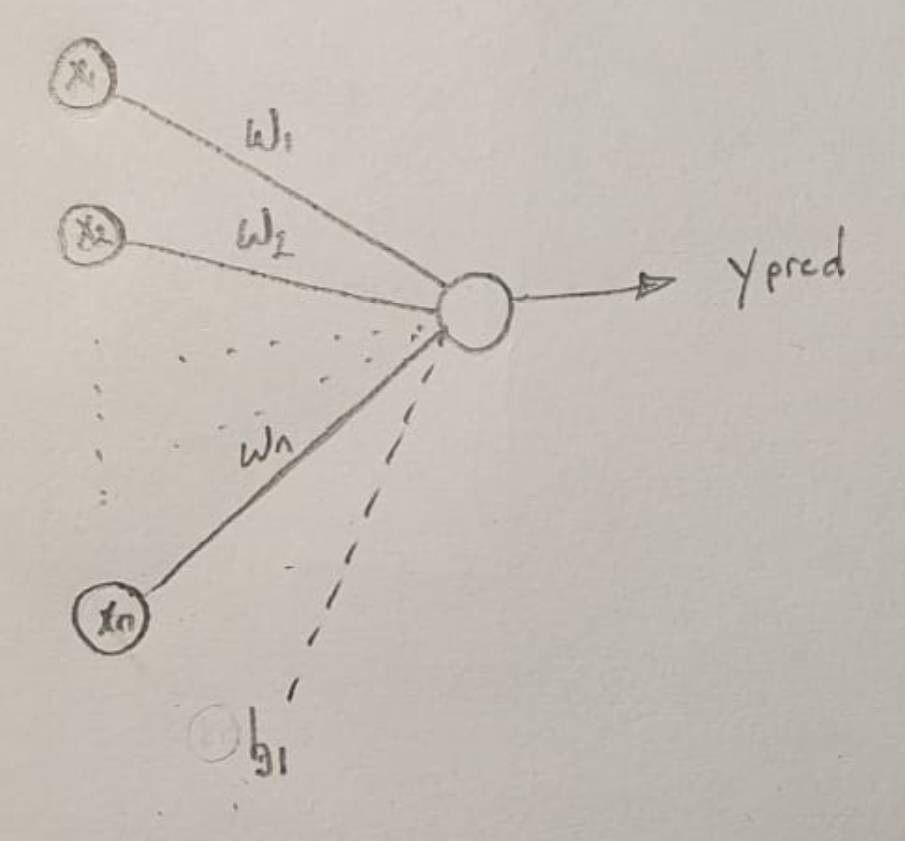

#### Let us now call the train function with 1000 epochs

In [156]:
training_loss=[]
val_loss=[]

for epoch in range(1000):
  loss,v_loss = train(X_train1, y_train1,X_val1,y_val1)
  training_loss.append(loss)
  val_loss.append(v_loss)
  
  print('Epoch %d: Training Loss = %.4f, validation_loss= %.4f' % (epoch, float(loss),float(v_loss)))


print('Final Weights after 100 epochs:')
print('###############################################################################')
print(weights)

print('Final Bias after 100 epochs:')
print('###############################################################################')
print(bias)

Epoch 0: Training Loss = 0.2957, validation_loss= 0.2697
Epoch 1: Training Loss = 0.2777, validation_loss= 0.2542
Epoch 2: Training Loss = 0.2610, validation_loss= 0.2398
Epoch 3: Training Loss = 0.2456, validation_loss= 0.2264
Epoch 4: Training Loss = 0.2313, validation_loss= 0.2141
Epoch 5: Training Loss = 0.2180, validation_loss= 0.2026
Epoch 6: Training Loss = 0.2057, validation_loss= 0.1920
Epoch 7: Training Loss = 0.1942, validation_loss= 0.1822
Epoch 8: Training Loss = 0.1837, validation_loss= 0.1731
Epoch 9: Training Loss = 0.1739, validation_loss= 0.1646
Epoch 10: Training Loss = 0.1648, validation_loss= 0.1568
Epoch 11: Training Loss = 0.1563, validation_loss= 0.1495
Epoch 12: Training Loss = 0.1485, validation_loss= 0.1428
Epoch 13: Training Loss = 0.1412, validation_loss= 0.1366
Epoch 14: Training Loss = 0.1345, validation_loss= 0.1308
Epoch 15: Training Loss = 0.1283, validation_loss= 0.1255
Epoch 16: Training Loss = 0.1225, validation_loss= 0.1205
Epoch 17: Training Loss 

Epoch 279: Training Loss = 0.0301, validation_loss= 0.0302
Epoch 280: Training Loss = 0.0300, validation_loss= 0.0302
Epoch 281: Training Loss = 0.0300, validation_loss= 0.0301
Epoch 282: Training Loss = 0.0299, validation_loss= 0.0300
Epoch 283: Training Loss = 0.0299, validation_loss= 0.0300
Epoch 284: Training Loss = 0.0298, validation_loss= 0.0299
Epoch 285: Training Loss = 0.0298, validation_loss= 0.0298
Epoch 286: Training Loss = 0.0297, validation_loss= 0.0297
Epoch 287: Training Loss = 0.0297, validation_loss= 0.0297
Epoch 288: Training Loss = 0.0296, validation_loss= 0.0296
Epoch 289: Training Loss = 0.0296, validation_loss= 0.0295
Epoch 290: Training Loss = 0.0295, validation_loss= 0.0295
Epoch 291: Training Loss = 0.0295, validation_loss= 0.0294
Epoch 292: Training Loss = 0.0294, validation_loss= 0.0293
Epoch 293: Training Loss = 0.0294, validation_loss= 0.0293
Epoch 294: Training Loss = 0.0293, validation_loss= 0.0292
Epoch 295: Training Loss = 0.0293, validation_loss= 0.02

Epoch 433: Training Loss = 0.0239, validation_loss= 0.0215
Epoch 434: Training Loss = 0.0239, validation_loss= 0.0215
Epoch 435: Training Loss = 0.0238, validation_loss= 0.0214
Epoch 436: Training Loss = 0.0238, validation_loss= 0.0214
Epoch 437: Training Loss = 0.0238, validation_loss= 0.0213
Epoch 438: Training Loss = 0.0237, validation_loss= 0.0213
Epoch 439: Training Loss = 0.0237, validation_loss= 0.0213
Epoch 440: Training Loss = 0.0237, validation_loss= 0.0212
Epoch 441: Training Loss = 0.0237, validation_loss= 0.0212
Epoch 442: Training Loss = 0.0236, validation_loss= 0.0211
Epoch 443: Training Loss = 0.0236, validation_loss= 0.0211
Epoch 444: Training Loss = 0.0236, validation_loss= 0.0210
Epoch 445: Training Loss = 0.0235, validation_loss= 0.0210
Epoch 446: Training Loss = 0.0235, validation_loss= 0.0210
Epoch 447: Training Loss = 0.0235, validation_loss= 0.0209
Epoch 448: Training Loss = 0.0234, validation_loss= 0.0209
Epoch 449: Training Loss = 0.0234, validation_loss= 0.02

Epoch 584: Training Loss = 0.0200, validation_loss= 0.0162
Epoch 585: Training Loss = 0.0199, validation_loss= 0.0162
Epoch 586: Training Loss = 0.0199, validation_loss= 0.0162
Epoch 587: Training Loss = 0.0199, validation_loss= 0.0161
Epoch 588: Training Loss = 0.0199, validation_loss= 0.0161
Epoch 589: Training Loss = 0.0199, validation_loss= 0.0161
Epoch 590: Training Loss = 0.0198, validation_loss= 0.0161
Epoch 591: Training Loss = 0.0198, validation_loss= 0.0160
Epoch 592: Training Loss = 0.0198, validation_loss= 0.0160
Epoch 593: Training Loss = 0.0198, validation_loss= 0.0160
Epoch 594: Training Loss = 0.0198, validation_loss= 0.0159
Epoch 595: Training Loss = 0.0197, validation_loss= 0.0159
Epoch 596: Training Loss = 0.0197, validation_loss= 0.0159
Epoch 597: Training Loss = 0.0197, validation_loss= 0.0159
Epoch 598: Training Loss = 0.0197, validation_loss= 0.0158
Epoch 599: Training Loss = 0.0197, validation_loss= 0.0158
Epoch 600: Training Loss = 0.0196, validation_loss= 0.01

Epoch 862: Training Loss = 0.0157, validation_loss= 0.0108
Epoch 863: Training Loss = 0.0157, validation_loss= 0.0108
Epoch 864: Training Loss = 0.0157, validation_loss= 0.0107
Epoch 865: Training Loss = 0.0157, validation_loss= 0.0107
Epoch 866: Training Loss = 0.0157, validation_loss= 0.0107
Epoch 867: Training Loss = 0.0157, validation_loss= 0.0107
Epoch 868: Training Loss = 0.0156, validation_loss= 0.0107
Epoch 869: Training Loss = 0.0156, validation_loss= 0.0107
Epoch 870: Training Loss = 0.0156, validation_loss= 0.0107
Epoch 871: Training Loss = 0.0156, validation_loss= 0.0106
Epoch 872: Training Loss = 0.0156, validation_loss= 0.0106
Epoch 873: Training Loss = 0.0156, validation_loss= 0.0106
Epoch 874: Training Loss = 0.0156, validation_loss= 0.0106
Epoch 875: Training Loss = 0.0156, validation_loss= 0.0106
Epoch 876: Training Loss = 0.0156, validation_loss= 0.0106
Epoch 877: Training Loss = 0.0155, validation_loss= 0.0106
Epoch 878: Training Loss = 0.0155, validation_loss= 0.01

As you can see the loss is continuously decreasing which means  model is learning

Let's plot the training and validation loss

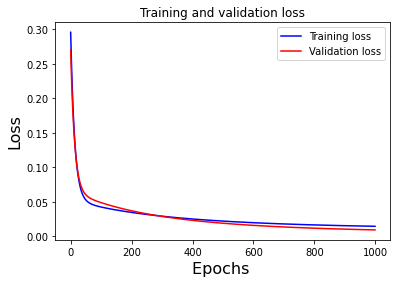

<Figure size 432x288 with 0 Axes>

In [157]:
plt.plot(range(len(training_loss)), training_loss, 'b', label='Training loss') #plotting training loss
plt.plot(range(len(val_loss)), val_loss, 'r', label='Validation loss') # plotting validation loss
plt.title('Training and validation loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

Above image shows plot of the training and validation loss. As you can see, lr model is not overfitting since validation and training loss is reducing gradually.

Let's us now test our model on the test data 

In [158]:
test_predictions = tf.matmul(X_test, weights) + bias
print(compute_loss(y_test, test_predictions))

tf.Tensor(0.010047126, shape=(), dtype=float32)


Let's check the R square to understand  how well the model has captured the variance of the dependent variable.

Let's predict

In [159]:
#Coverting tesnor to numpy array
test_predictions=np.array(test_predictions)

In [160]:
test_predictions

array([[0.39729226],
       [0.414788  ],
       [0.6476813 ],
       [0.49843904],
       [0.3523069 ],
       [0.4337015 ],
       [0.37172356],
       [0.47543478],
       [0.53673005],
       [0.55866617],
       [0.73560774],
       [0.7472813 ],
       [0.52548987],
       [0.73992765],
       [0.42115244],
       [0.67462635],
       [0.4600403 ],
       [0.54042184],
       [0.24718314],
       [0.55199873],
       [0.583017  ],
       [0.46737713],
       [0.74140626],
       [0.45354077],
       [0.543909  ],
       [0.58515036],
       [0.20459077],
       [0.319472  ],
       [0.54617107],
       [0.535267  ]], dtype=float32)

In [161]:
target_scaler.inverse_transform(test_predictions.reshape(-1, 1))

array([[11557.092 ],
       [11802.032 ],
       [15062.538 ],
       [12973.146 ],
       [10927.296 ],
       [12066.821 ],
       [11199.13  ],
       [12651.088 ],
       [13509.222 ],
       [13816.326 ],
       [16293.509 ],
       [16456.94  ],
       [13351.857 ],
       [16353.987 ],
       [11891.134 ],
       [15439.77  ],
       [12435.564 ],
       [13560.906 ],
       [ 9455.563 ],
       [13722.982 ],
       [14157.238 ],
       [12538.279 ],
       [16374.6875],
       [12344.571 ],
       [13609.726 ],
       [14187.105 ],
       [ 8859.2705],
       [10467.607 ],
       [13641.3955],
       [13488.738 ]], dtype=float32)

 Let's check the R squared to understand  how well  model captured the variance of dependent variable.

In [162]:
sklearn.metrics.r2_score(target_scaler.inverse_transform(y_test.reshape(-1, 1)),target_scaler.inverse_transform(test_predictions.reshape(-1, 1)))

0.6829033384115725

R2 is  0.682 and it seems to be fine. But you cannot use R-squared to determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

R-squared does not indicate if a regression model provides an adequate fit to your data. A good model can have a low R2 value. On the other hand, a biased model can have a high R2 value!

Let's plot the residual plot 

In [163]:
y_test

array([[0.46464285],
       [0.5637857 ],
       [0.57142854],
       [0.52778566],
       [0.28599998],
       [0.5307143 ],
       [0.28607145],
       [0.21435717],
       [0.6071428 ],
       [0.5712143 ],
       [0.78571427],
       [0.7140714 ],
       [0.4995    ],
       [0.71457136],
       [0.46464285],
       [0.6424999 ],
       [0.21457145],
       [0.6428571 ],
       [0.17857143],
       [0.6365    ],
       [0.54207146],
       [0.49999997],
       [0.64264286],
       [0.2857143 ],
       [0.59314287],
       [0.7132143 ],
       [0.07035714],
       [0.3442857 ],
       [0.48464283],
       [0.50028574]], dtype=float32)

In [164]:
test_predictions

array([[0.39729226],
       [0.414788  ],
       [0.6476813 ],
       [0.49843904],
       [0.3523069 ],
       [0.4337015 ],
       [0.37172356],
       [0.47543478],
       [0.53673005],
       [0.55866617],
       [0.73560774],
       [0.7472813 ],
       [0.52548987],
       [0.73992765],
       [0.42115244],
       [0.67462635],
       [0.4600403 ],
       [0.54042184],
       [0.24718314],
       [0.55199873],
       [0.583017  ],
       [0.46737713],
       [0.74140626],
       [0.45354077],
       [0.543909  ],
       [0.58515036],
       [0.20459077],
       [0.319472  ],
       [0.54617107],
       [0.535267  ]], dtype=float32)

<AxesSubplot:>

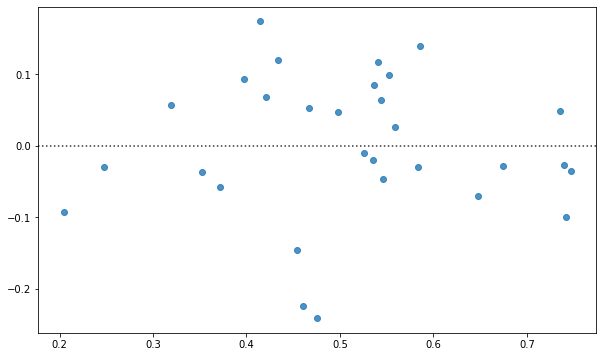

In [165]:
plt.figure(figsize=(10,6))
sns.residplot(x=test_predictions, y=y_test)

Above residual plot shows the random pattern around the baseline of 0 residual which means linear regression is a good choice for this Data 

##Keras Implementation

###Lets Build the model using keras

We’ll use a Sequential model with  multiple connected hidden layers, and an output layer that returns a single, continuous value.

**What Are Keras and tf.keras?**


Keras is an open-source deep learning library written in Python.

The project was started in 2015 by Francois Chollet. It quickly became a popular framework for developers, becoming one of, if not the most, popular deep learning libraries.

During the period of 2015-2019, developing deep learning models using mathematical libraries like TensorFlow, Theano, and PyTorch was cumbersome, requiring tens or even hundreds of lines of code to achieve the simplest tasks. The focus of these libraries was on research, flexibility, and speed, not ease of use.

Keras was popular because the API was clean and simple, allowing standard deep learning models to be defined, fit, and evaluated in just a few lines of code.

A secondary reason Keras took-off was because it allowed you to use any one among the range of popular deep learning mathematical libraries as the backend (e.g. used to perform the computation), such as TensorFlow, Theano, and later, CNTK. This allowed the power of these libraries to be harnessed (e.g. GPUs) with a very clean and simple interface.

In 2019, Google released a new version of their TensorFlow deep learning library (TensorFlow 2) that integrated the Keras API directly and promoted this interface as the default or standard interface for deep learning development on the platform.

This integration is commonly referred to as the tf.keras interface or API (“tf” is short for “TensorFlow“). This is to distinguish it from the so-called standalone Keras open source project.

**Standalone Keras** The standalone open source project that supports TensorFlow, Theano and CNTK backends.

**tf.keras** The Keras API integrated into TensorFlow 2.
The Keras API implementation in Keras is referred to as “tf.keras” because this is the Python idiom used when referencing the API. First, the TensorFlow module is imported and named “tf“; then, Keras API elements are accessed via calls to tf.keras; for example:

# example of tf.keras python 
import tensorflow as tf
# use keras API
model = tf.keras.Sequential()


### Building the model using tf.keras: 



In [166]:
def build_model_t():
  #Creating a sequential model with multiple dense layers
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=X_train.shape),
   
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.SGD(0.001)  # Defining the optimizer 

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices 
  return model

###Building the model using Keras standalone library

In [167]:
import keras # importing keras library
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense       # importing Dense layer
def build_model():
  ## Initializing the ANN
    

  model = Sequential() 
  # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
  input_layer = Dense(32, input_shape=(X_train.shape[1],),activation='relu')
  model.add(input_layer) # 
  #Adding the hidden layer
  # Notice that we do not need to specify input dim. 
  hidden_layer = Dense(64, activation='relu'); 
  model.add(hidden_layer) 
  #Adding the output layer
  # Notice that we do not need to specify input dim. 
  # we have an output of 1 node, which is the the desired dimensions of our output 
  # We use the sigmoid because we want probability outcomes
  output_layer = Dense(1,activation='relu') 
  
  model.add(output_layer)


  optimizer = keras.optimizers.RMSprop(0.001)  # Defining the optimizer 

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices 
  return model

Build the model and view the summary

In [168]:
#Getting the model summary. We are uisng standalone keras to build our model
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


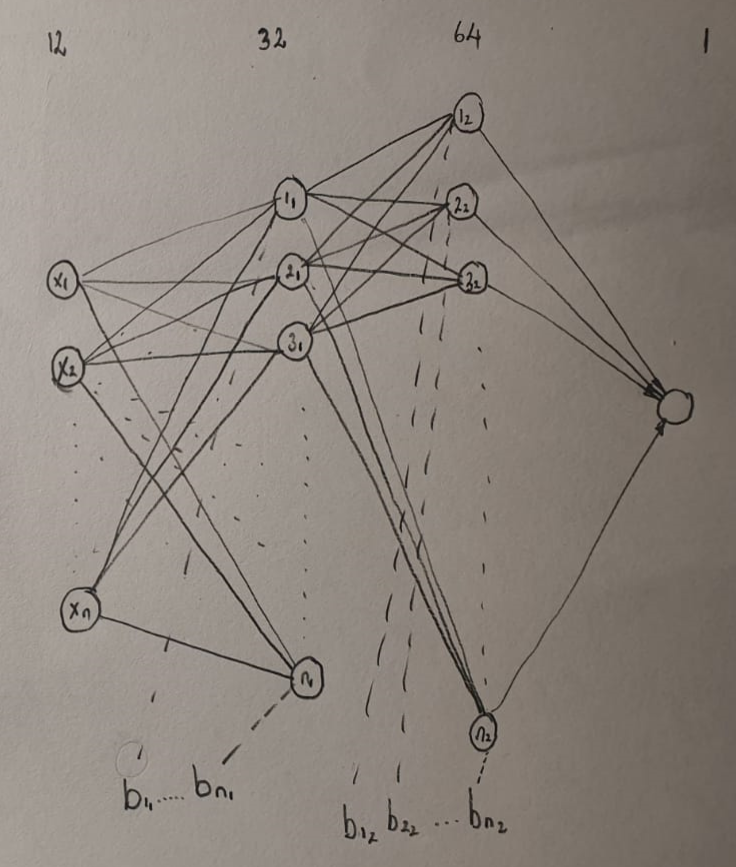

Let’s now train the model for 100 epochs, and record the training and validation accuracy in ‘history’.

In [169]:
#Definign the number of epochs
EPOCHS = 100
#fitting the model
history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,)

Train on 73 samples, validate on 19 samples
Epoch 1/100
73/73 [==============================] - 0s 964us/step - loss: 0.2517 - mse: 0.2517 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 2/100
73/73 [==============================] - 0s 56us/step - loss: 0.1196 - mse: 0.1196 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 3/100
73/73 [==============================] - 0s 82us/step - loss: 0.0809 - mse: 0.0809 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 4/100
73/73 [==============================] - 0s 55us/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 5/100
73/73 [==============================] - 0s 55us/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 6/100
73/73 [==============================] - 0s 68us/step - loss: 0.0529 - mse: 0.0529 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 7/100
73/73 [==============================] - 0s 82us/step - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0511 - val_mse: 0.0511
Epoch 8/100
73/73 [============

Let's plot the  validation and training loss

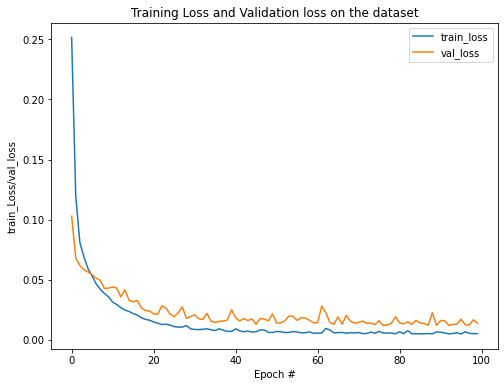

In [170]:

N = 100
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="best")
plt.show()


##Testing the model



In [171]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 0s 33us/step


[0.005831444635987282, 0.005831444635987282]

Let’s predict


In [172]:
#Lets Print the predicted prices 
test_predictionsk=model.predict(X_test)
y_pred1=target_scaler.inverse_transform(test_predictionsk.reshape(-1, 1))

Let's Calculate the R2 to evaluate the model

In [173]:
target_scaler.inverse_transform(y_test.reshape(-1, 1))

array([[12500.   ],
       [13888.   ],
       [13995.   ],
       [13384.   ],
       [ 9999.   ],
       [13425.   ],
       [10000.   ],
       [ 8996.   ],
       [14495.   ],
       [13992.001],
       [16995.   ],
       [15992.   ],
       [12988.   ],
       [15999.   ],
       [12500.   ],
       [14989.999],
       [ 8999.   ],
       [14995.   ],
       [ 8495.   ],
       [14906.001],
       [13584.001],
       [12995.   ],
       [14992.001],
       [ 9995.   ],
       [14299.001],
       [15980.   ],
       [ 6980.   ],
       [10815.   ],
       [12780.   ],
       [12999.001]], dtype=float32)

In [174]:
y_pred1

array([[11718.074 ],
       [11997.596 ],
       [14616.531 ],
       [13757.691 ],
       [10314.697 ],
       [12891.368 ],
       [10685.87  ],
       [10510.706 ],
       [13723.949 ],
       [12672.745 ],
       [16689.43  ],
       [17942.523 ],
       [13050.181 ],
       [16756.162 ],
       [11382.629 ],
       [15730.97  ],
       [10135.7295],
       [13080.388 ],
       [ 9312.516 ],
       [13532.218 ],
       [14512.001 ],
       [13551.98  ],
       [17068.53  ],
       [10070.435 ],
       [13775.2705],
       [16712.877 ],
       [ 8526.328 ],
       [10216.485 ],
       [13791.44  ],
       [13483.568 ]], dtype=float32)

In [175]:
sklearn.metrics.r2_score(target_scaler.inverse_transform(y_test.reshape(-1, 1)),y_pred1)

0.8159541796489806

<AxesSubplot:>

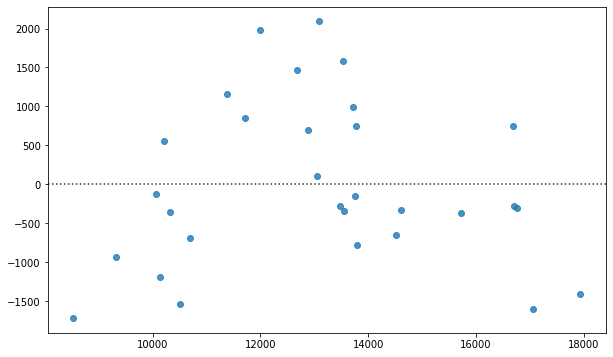

In [176]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred1, y=target_scaler.inverse_transform(y_test.reshape(-1, 1)))

**Conclusion:** 

Cars which are manufactured recently are costly and have  less mileage.

Price of car is highly dependent on the mileage and the manufacturing year

Automatic cars have higher price range than manual type cars. 

There is an increment in price of automatic cars between 2010 and 2015. 





We learnt creating a very simple linear regression model on cars data and predicted prices. 



<i>Happy Learning!</i>

### Extra - gradient descent

First: loss function!

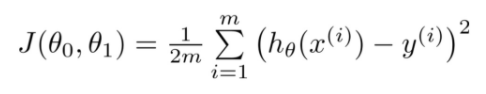

Next: Gradient descent!

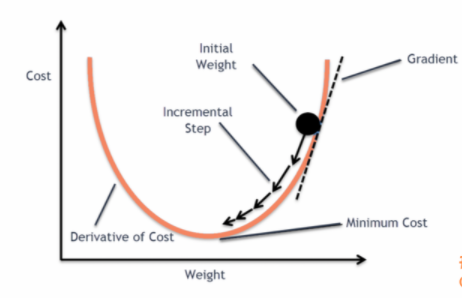

Last: can we get stuck in local minima..?? (source: Gfycat)

<img src="90062gdopt.gif" width="750" align="center">

Recomended material - But what is a neural network? | Chapter 1, Deep learning: https://www.youtube.com/watch?v=aircAruvnKk